## Source: Climate Change: Earth Surface Temperature Data
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/

Data from 1743 - 2013

In [88]:
!ls ../data

 commodity_trade_statistics_data.csv
 fao
 GlobalLandTemperaturesByCountry.csv
 GlobalTemperatures.csv
 health-nutrition-and-population-statistics.csv
 helper
'NFA 2018.csv'
 test


In [91]:
#flags
%matplotlib inline
%load_ext autoreload
%autoreload 2

#general
import time
import warnings
warnings.filterwarnings('ignore')
# data
import numpy as np
import pandas as pd
import pandas_profiling

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# visualization
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import plotly.offline as py

import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

py.init_notebook_mode(connected=True)
import plotly.graph_objs as god9b8
import plotly.tools as tls
import seaborn as sns

#custom
from util.eda import *

# change display of floats in dataframes
# pd.set_option('display.floa/Users/lukas/Downloads/titanic/train.csvt_format', lambda x: "{0:,.0f}".format(x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data, basic data inspection

In [92]:
df = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')

In [93]:
# inspect columns
inspect_columns(df)

number of columns 4
['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']


In [94]:
# inspect rows
inspect_rows(df)

number of rows 577462
  0  1743-11-01      4.384    2.294  Åland
---  ------------  -------  -------  -------
  1  1743-12-01        nan      nan  Åland
  2  1744-01-01        nan      nan  Åland
  3  1744-02-01        nan      nan  Åland
  4  1744-03-01        nan      nan  Åland


In [95]:
# exploratory data analysis
eda(df)

missing values:
 dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

dataframe index:
 RangeIndex(start=0, stop=577462, step=1)

dataframe types:
 dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

dataframe shape:
 (577462, 4)

dataframe index:
 RangeIndex(start=0, stop=577462, step=1)

dataframe describe:ń        AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                    

In [96]:
# inspecct data types
dtypes_and_ranges(df)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object
NUMERIC VALUES and RANGES

NUMERIC AverageTemperature:    76606 different values from:    -37.658 to 39
NUMERIC AverageTemperatureUncertainty:    8980 different values from:    0.052000000000000005 to 15

STRING VALUES and UNIQUES

STRING: dt has 3239 entries

['1743-11-01' '1743-12-01' '1744-01-01' '1744-02-01' '1744-03-01'
 '1744-04-01' '1744-05-01' '1744-06-01' '1744-07-01' '1744-08-01'
 '1744-09-01' '1744-10-01' '1744-11-01' '1744-12-01' '1745-01-01'
 '1745-02-01' '1745-03-01' '1745-04-01' '1745-05-01' '1745-06-01'
 '1745-07-01' '1745-08-01' '1745-09-01' '1745-10-01' '1745-11-01'
 '1745-12-01' '1746-01-01' '1746-02-01' '1746-03-01' '1746-04-01'
 '1746-05-01' '1746-06-01' '1746-07-01' '1746-08-01' '1746-09-01'
 '1746-10-01' '1746-11-01' '1746-12-01' '1747-01-01' '1747-02-01'
 '1747-03-01' '1747-04-01' '1747-

### Analyze nans

In [97]:
# number of nans
t = df[df.isna().any(axis=1)]

print(f"In {len(df)} entries there are {len(t)} entries with at least one nan")

In 577462 entries there are 32651 entries with at least one nan


In [98]:
# remove nans
no_nan =  df.dropna(subset=['dt', 'AverageTemperature', 'Country'])
print(f"entries count without nans: {len(no_nan)}")

entries count without nans: 544811


In [99]:
# check that removed count is equal to nan count
len(df) - len(no_nan)

32651

## ETL

In [100]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

no_nan_clear = no_nan[~no_nan['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

print(len(no_nan_clear))

no_nan_clear = no_nan_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

526013


In [101]:
#  add years column
no_nan_clear['year'] = no_nan_clear['dt'].str[:4]
no_nan_clear_with_year = no_nan_clear.astype({'year': 'int32'})

print("Show all unique years: ")
np.unique(no_nan_clear_with_year['year'])

Show all unique years: 


array([1743, 1744, 1745, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757,
       1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779,
       1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 18

### Calculate mean temperatures for each country and year

In [102]:
surface_temp_by_year_and_country = no_nan_clear_with_year.groupby(['year', 'Country'], as_index=False).agg({'AverageTemperature': 'mean', 'AverageTemperatureUncertainty': 'mean'})

In [103]:
len(surface_temp_by_year_and_country)

44334

### Rename column names

In [104]:
print(f"previous column names: {list(surface_temp_by_year_and_country)}")

previous column names: ['year', 'Country', 'AverageTemperature', 'AverageTemperatureUncertainty']


In [105]:
tt = surface_temp_by_year_and_country.rename(columns={"Country": "country_or_area", "AverageTemperature": "temperature", "AverageTemperatureUncertainty": "uncertainty"})

In [106]:
print(f"renamed column names: {list(tt)}")

renamed column names: ['year', 'country_or_area', 'temperature', 'uncertainty']


### Show values for an example year:

In [107]:
year_data = surface_temp_by_year_and_country[surface_temp_by_year_and_country['year'] == 1850]
year_data

,year,Country,AverageTemperature,AverageTemperatureUncertainty
7541,1850,Afghanistan,13.326083,1.961917
7542,1850,Albania,11.734667,1.427667
7543,1850,Algeria,22.587333,1.707583
7544,1850,Andorra,10.651750,1.386083
7545,1850,Anguilla,26.106333,1.130833
7546,1850,Antigua And Barbuda,25.933250,1.122083
7547,1850,Armenia,7.793167,1.702167
7548,1850,Aruba,27.438167,1.197167
7549,1850,Asia,6.586750,0.965250
7550,1850,Austria,5.536667,1.465667


### Show all countries between 1988 and 2016 (time period we have for the comm

In [108]:
s = surface_temp_by_year_and_country

In [109]:
s_data = s[ (s['year'] >= 1988) & (s['year'] <= 2016) ]
s_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua And Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea

# Graphics

source https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming

#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

## Look at the world for a specific year

In [110]:
def plot_world_map_with_data(countries, data, year):

    data = [ dict(
            type = 'choropleth',
            locations = countries,
            z = data,
            locationmode = 'country names',
            text = countries,
            marker = dict(
                line = dict(color = 'rgb(0,0,0)', width = 1)),
                colorbar = dict(autotick = True, tickprefix = '', 
                title = '# Average\nTemperature,\n°C')
                )
           ]

    layout = dict(
        title = 'Average land temperature in countries ' + str(year),
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = 'rgb(0,255,255)',
            projection = dict(
            type = 'orthographic',
                rotation = dict(
                        lon = 60,
                        lat = 10),
            ),
            lonaxis =  dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                ),
            lataxis = dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                    )
                ),
            )

    fig = dict(data=data, layout=layout)
    py.iplot(fig, validate=False, filename='worldmap')
    


def filter_and_plot(data, year):
    year_data = data[data['year'] == year]
    countries = np.unique(year_data['Country'])
    mean_temp = year_data['AverageTemperature'] 
    plot_world_map_with_data(countries, mean_temp, year)

    
filter_and_plot(surface_temp_by_year_and_country, 1988)

### Vizualisation of temperature on earth - step through with a slide in steps of 30 years

In [111]:
int_range = widgets.IntSlider(
    value=0,
    min=0,
    max=270,
    step=30,
)
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        clear_output(wait=True)
        filter_and_plot(surface_temp_by_year_and_country, 1743+change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0, max=270, step=30)

Output()

### Vizualisation of temperature on earth - step through with a player

In [112]:
play = widgets.Play(
    interval=2000,
    value=0,
    min=0,
    max=100,
    step=10,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])
output = widgets.Output()


display(play, output)

def on_value_change(change):
    with output:
        print(change['new'])
        clear_output(wait=True)
        filter_and_plot(surface_temp_by_year_and_country, 1913+change['new'])

play.observe(on_value_change, names='value')

Play(value=0, description='Press play', interval=2000, step=10)

Output()

### Vizualisation of temperature on earth - Vertical Bar Chart - ordered from hottest to coldest country for a specific year - show 1-5, 20-25, 50-55, 100-105, 150-155, 200-205

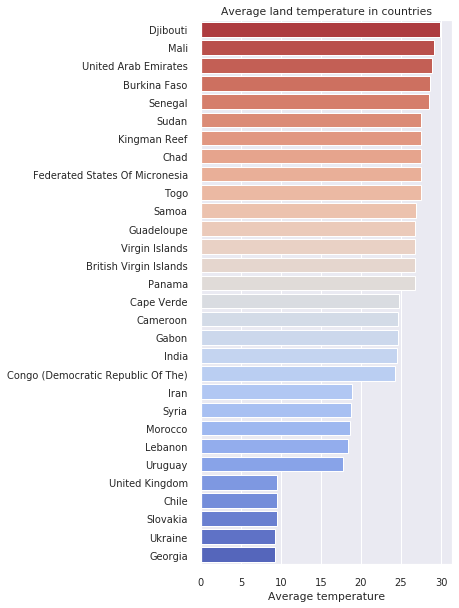

In [113]:
def plot_vertical_bar_chart(data, year):
    year_data = data[data['year'] == year]
    countries = np.unique(year_data['Country'])
    mean_temp = year_data['AverageTemperature']
    
    mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                                 reverse = True)))
    
    property_a = mean_temp_bar
    property_b = countries_bar
    good_indices = [0, 1, 2, 3, 4, 20, 21, 22, 23, 24, 50, 51, 52, 53, 54, 100, 101, 102, 103, 104, 150, 151, 152, 153, 154, 200, 201, 202, 203, 204]
    property_asel = [property_a[i] for i in good_indices]
    property_bsel = [property_b[i] for i in good_indices]
    
    mean_temp_bar = property_asel
    countries_bar = property_bsel
    
    sns.set(font_scale=0.9) 
    f, ax = plt.subplots(figsize=(4.5, 10))
    colors_cw = sns.color_palette('coolwarm', len(countries_bar))
    sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
    Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')
    
plot_vertical_bar_chart(surface_temp_by_year_and_country, 2000)

### Display temperature development for earch from 1744 up until 2011

In [114]:
global_temp = pd.read_csv("../data/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)